# SOK-1006 V25

## Forelesning 7 - Velferdseffekter av økonomisk politikk under fullkommen konkurranse (Kap 9)

#### 1. Forutsetninger for fullkommen konkurranse

- Det omsettes private goder i markedet uten eksterne virkninger.
- Det er et stort antall tilbydere og etterspørere, og ingen kan påvirke prisen.
- Produsenter fremstiller identiske produkter. Konsumenten er likegyldig hvem de kjøper hos.
- Aktørene i markedet er økonomisk rasjonelle (maksimering av fortjeneste og nytte).
- Full informasjon.
- Prisen er bestemt i samspill mellom tilbud og etterspørsel.
- Markedsdeltakere kan fritt gå inn eller ut av markedet.


#### 2. Likevekt under fullkommen konkurranse

Vi setter opp tilbud og etterspørsel, finner likevekten, og tegner likevekten i en figur. Dette er likevekt under fullkommen konkurranse, og dette har vi sett på før.


In [284]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

La oss tegne inn likevektspris og -kvantum.

*Oppgave*           

*Her er etterspørsel og tilbud med en stykkavgift ($t$) som er pålagt selgere av produktet ($a,b,A,B>0$):*

$$
   x^{D}= a - b p
$$


$$
   x^{S}= -A + B (p-t)
$$

*(a) Bruk SymPy til å beregne likevektspris- og kvantum som en funksjon av $t$.*       
*(b) Finn et uttrykk for konsument-, produsent-, og samfunnsøkonomisk overskudd med $t=0$.*                
*(c) Beregn KO, PO og SO for $t>0$, samt endringen fra situasjonen før avgiften ble innført.*          
*(d) Hvor mye endres KO, PO og SO pga innføring av avgiften, og hvordan avhenger dette av $a,b,A,B$?*                   
*(e) Forklar intuisjonen bak dine resultater.* 

In [285]:
#Har definert tilbud og etterspørsel to ganger, en med symbolske utrykk for a svare på oppgavene og en med numeriske tall, slik at jeg kan se om jeg har svart riktig.
a, b, p, t, A, B = sp.symbols('a b p t A B', real=True, positive=True)
def e_x_2(a, b, p):
    return a - b*p
def t_x(A, B, p,t):
    return - A + B*(p-t)
def e_x_2_v(p):
    return 100-0.5*p
def t_x_v(p,t):
    return 0 + 0.7*(p-t)


In [286]:


equ_t = sp.Eq(e_x_2(a, b, p), t_x(A, B, p, 0))
equ_t_v = sp.Eq(e_x_2_v(p), t_x_v( p, 0))
display(equ_t)
display(equ_t_v)

Eq(a - b*p, -A + B*p)

Eq(100 - 0.5*p, 0.7*p)

In [287]:
#finner først likevektsprisene for pris og kvantum
e_sol = sp.solve(equ_t, p)
e_sol_v = sp.solve(equ_t_v, p)
display(e_sol[0])
display(e_sol_v[0])


(A + a)/(B + b)

83.3333333333333

In [288]:
p_sol = e_x_2(a,b, e_sol[0])
p_sol_v = e_x_2_v( e_sol_v[0])
display(p_sol)
display(p_sol_v)

a - b*(A + a)/(B + b)

58.3333333333333

In [289]:
#Bruker integrate for å finne produsentoverskudd
producer_surplus_2 = sp.integrate(p_sol - t_x(A, B, p, 0), (p, 0, e_sol)) 
producer_surplus_2_v = sp.integrate(p_sol_v - t_x_v(p, 0), (p, 0, e_sol_v))
display(producer_surplus_2)
display(producer_surplus_2_v)

-B*(A + a)**2/(2*(B + b)**2) + (A + a)*(A*B + B*a)/(B + b)**2

2430.55555555556

In [290]:
# Samme med konsumentoverskudd
consumer_surplus_2=sp.integrate(e_x_2(a,b,p)-p_sol,(p,0,e_sol))
consumer_surplus_2_v=sp.integrate(e_x_2_v(p)-p_sol_v,(p,0,e_sol_v))
display(consumer_surplus_2)
display(consumer_surplus_2_v)

-b*(A + a)**2/(2*(B + b)**2) + (A + a)*(A*b + a*b)/(B + b)**2

1736.11111111111

In [291]:
#Tilslutt samfunnsøkonomisk overskudd, som vi kan se er riktig fordi den numeriske urtregnignen gir menining
welfare_surplus_2=sp.integrate(e_x_2(a,b,p)-t_x(A,B,p,0),(p,0,e_sol))
welfare_surplus_2_v=sp.integrate(e_x_2_v(p)-t_x_v(p,0),(p,0,e_sol_v))
display(welfare_surplus_2)
display(welfare_surplus_2_v)

(A + a)**2*(-B/2 - b/2)/(B + b)**2 + (A + a)**2/(B + b)

4166.66666666667

In [292]:
#Her regner jeg ut overskuddene der t > 0, jeg har hørt at man ikke trenger integrate for å løse denne oppgaven, men jeg vet ikke hvordan, men de numeriske verdien vikrer riktig
#jeg tror ikke måten jeg gjør det på er galt, men er ikke helt sikker :(
producer_surplus_2_t = sp.integrate(p_sol - t_x(A, B, p, t), (p, t, e_sol)) 
consumer_surplus_2_t=sp.integrate(e_x_2(a,b,p)-p_sol,(p,t,e_sol))
welfare_surplus_2_t=sp.integrate(e_x_2(a,b,p)-t_x(A,B,p,t),(p,t,e_sol))
display(producer_surplus_2_t)
display(consumer_surplus_2_t)
display(welfare_surplus_2_t)
producer_surplus_2_t_v = sp.integrate(p_sol_v - t_x_v(p, 10), (p, 10, e_sol_v)) 
consumer_surplus_2_t_v=sp.integrate(e_x_2_v(p)-p_sol_v,(p,10,e_sol_v))
welfare_surplus_2_t_v=sp.integrate(e_x_2_v(p)-t_x_v(p,10),(p,10,e_sol_v))
display(producer_surplus_2_t_v)
display(consumer_surplus_2_t_v)
display(welfare_surplus_2_t_v)


B*t**2/2 - B*(A + a)**2/(2*(B + b)**2) - t*(A*B + B**2*t + B*a + B*b*t)/(B + b) + (A + a)*(A*B + B**2*t + B*a + B*b*t)/(B + b)**2

b*t**2/2 - b*(A + a)**2/(2*(B + b)**2) - t*(A*b + a*b)/(B + b) + (A + a)*(A*b + a*b)/(B + b)**2

-t**2*(-B/2 - b/2) - t*(A + B*t + a) + (A + a)**2*(-B/2 - b/2)/(B + b)**2 + (A + a)*(A + B*t + a)/(B + b)

2395.55555555556

1344.44444444444

3740.00000000000

In [293]:
#Tilsutt bruker jeg factor for å finne ut hvor mye verdiene har endret seg.
consumer_change = consumer_surplus_2 - consumer_surplus_2_t
producer_change = producer_surplus_2 - producer_surplus_2_t
welfare_change = welfare_surplus_2 - welfare_surplus_2_t
consumer_change_v = consumer_surplus_2_v - consumer_surplus_2_t_v
producer_change_v = producer_surplus_2_v - producer_surplus_2_t_v
welfare_change_v = welfare_surplus_2_v - welfare_surplus_2_t_v

display(sp.factor(producer_change))
display(sp.factor(consumer_change))
display(sp.factor(welfare_change))
display(sp.factor(producer_change_v))
display(sp.factor(consumer_change_v))
display(sp.factor(welfare_change_v))

B*t**2/2

-b*t*(-2*A + B*t - 2*a + b*t)/(2*(B + b))

-t*(-2*A*b - B**2*t - 2*a*b + b**2*t)/(2*(B + b))

34.9999999999995

391.666666666667

426.666666666666

Det endringen sier oss er at det er genrelt er at a og A bestemmer den maksimale prodiskjons og betalingvilligheten, mens b,B påvirker elastistieten. Jo større b,B jo flatere blir tilbud og etterspørselskurven, og dermed blir også påvirnknigen av endringen i tilbud enda større. Grafen under viser hvordan avgiften påvirker tilbudet og skifter likevekten.

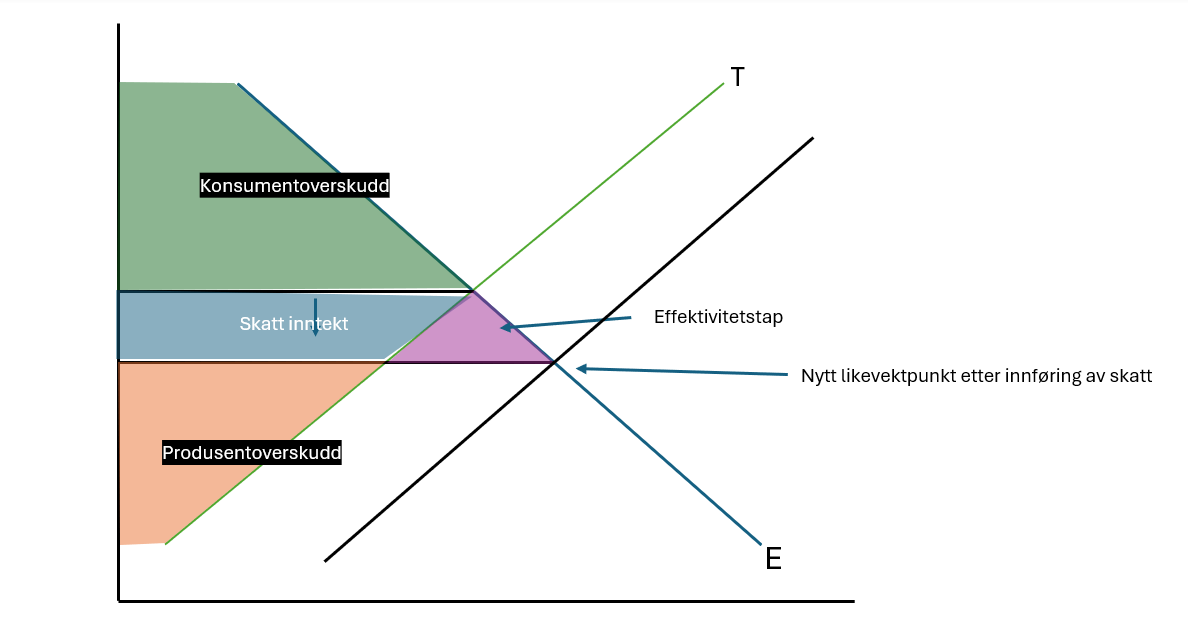

Som vi kan se fra denne tegningen jeg har laget i powerpoint, fører en økining i stykkpris til et høyreskifte i tilbudskurve, noe som betyr høyere priser på varer og dermed redusert etterspørsel. Likevektspunktet flytter seg ned på grafen som gir ett redusert produsent overskudd og gir økte skatteinntekter. Samtidig kan se i den lila trekanten, at en innføring av stykkpris skaper et samfunnsøkonomisk effektivetetstap, som betyr at samfunnet som en helhet ikke har optimal ytelse. 